In [1]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

# Load the provided dataset
data_path = 'weather_prediction_dataset_cleaned.pkl'
data = pd.read_pickle(data_path)

# Check the structure and contents of the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(151), int64(13), object(1)
memory usage: 4.6+ MB


(None,
          DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
 0  2000-01-01      1                  8            0.89          1.0286   
 1  2000-01-02      1                  8            0.87          1.0318   
 2  2000-01-03      1                  5            0.81          1.0314   
 3  2000-01-04      1                  7            0.79          1.0262   
 4  2000-01-05      1                  5            0.90          1.0246   
 
    BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
 0                    0.20                 0.03             0.0   
 1                    0.25                 0.00             0.0   
 2                    0.50                 0.00             3.7   
 3                    0.63                 0.35             6.9   
 4                    0.51                 0.07             3.7   
 
    BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
 0              2.9             1.6  ...                -9.3   
 1 

In [2]:
# Define a target change in sunshine prediction
desired_change = 1  # Example: we want the prediction to increase by 1

In [3]:
# Limit the number of rows to display for counterfactuals
num_samples_to_display = 3  # Only display results for 3 samples
num_features_to_modify = 2  # Only modify the top 2 most important features based on SHAP

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 1.5217


ExactExplainer explainer: 732it [00:22, 18.40it/s]                                                                     


SHAP Summary Plot for BASEL:


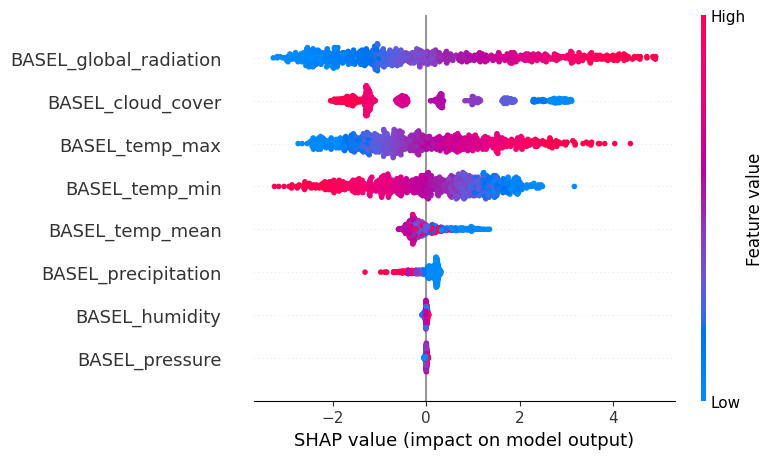

SHAP Dependence Plot for BASEL (first feature):


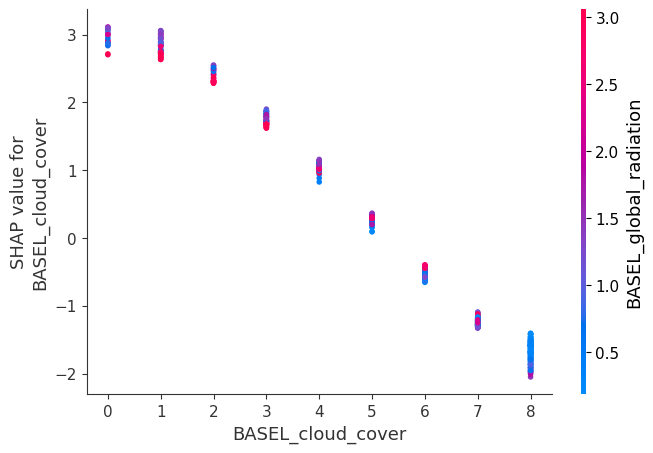


Counterfactual explanation for sample 506 with original prediction: [0.58]
Modified feature values to achieve new prediction: [1.58]
Feature Modifications:
                                       Feature  Original Value  Modified Value
BASEL_global_radiation  BASEL_global_radiation            0.39            0.86
BASEL_cloud_cover            BASEL_cloud_cover            7.00            7.00


Counterfactual explanation for sample 499 with original prediction: [-0.2]
Modified feature values to achieve new prediction: [0.81]
Feature Modifications:
                                       Feature  Original Value  Modified Value
BASEL_global_radiation  BASEL_global_radiation            0.08            0.75
BASEL_cloud_cover            BASEL_cloud_cover            8.00            8.00


Counterfactual explanation for sample 70 with original prediction: [7.39]
Modified feature values to achieve new prediction: [8.4]
Feature Modifications:
                                       Feature  Origina

ExactExplainer explainer: 732it [00:13, 13.46it/s]                                                                     


SHAP Summary Plot for BUDAPEST:


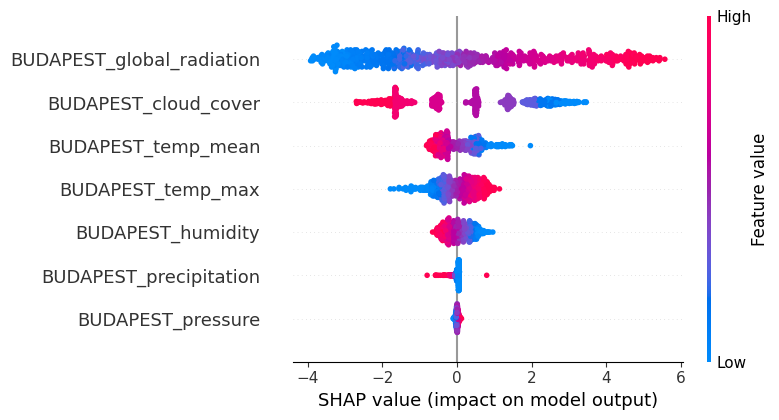

SHAP Dependence Plot for BUDAPEST (first feature):


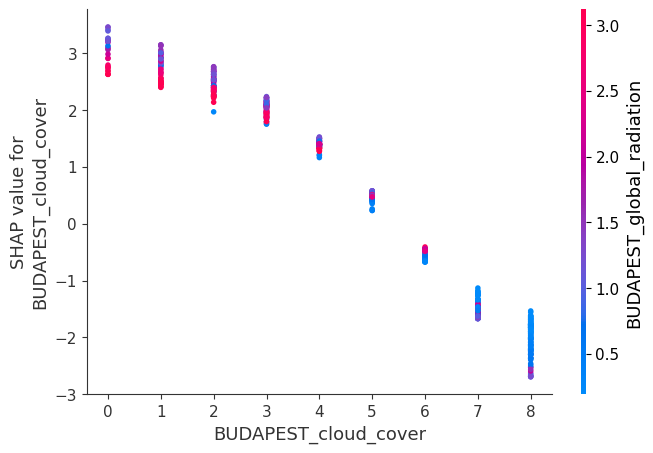


Counterfactual explanation for sample 339 with original prediction: [6.84]
Modified feature values to achieve new prediction: [7.86]
Feature Modifications:
                                             Feature  Original Value  \
BUDAPEST_global_radiation  BUDAPEST_global_radiation            2.01   
BUDAPEST_cloud_cover            BUDAPEST_cloud_cover            5.00   

                           Modified Value  
BUDAPEST_global_radiation            2.34  
BUDAPEST_cloud_cover                 5.00  


Counterfactual explanation for sample 726 with original prediction: [9.55]
Modified feature values to achieve new prediction: [10.57]
Feature Modifications:
                                             Feature  Original Value  \
BUDAPEST_global_radiation  BUDAPEST_global_radiation            2.21   
BUDAPEST_cloud_cover            BUDAPEST_cloud_cover            4.00   

                           Modified Value  
BUDAPEST_global_radiation            2.53  
BUDAPEST_cloud_cover          

ExactExplainer explainer: 732it [01:38,  6.68it/s]                                                                     


SHAP Summary Plot for DEBILT:


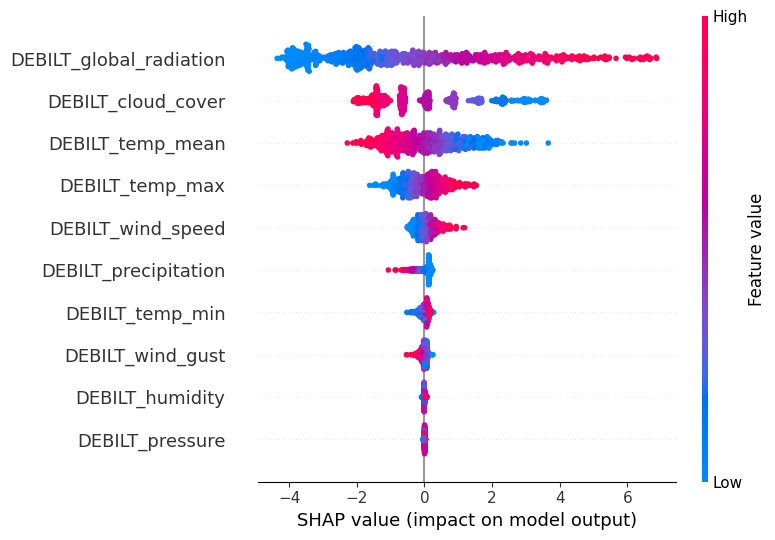

SHAP Dependence Plot for DEBILT (first feature):


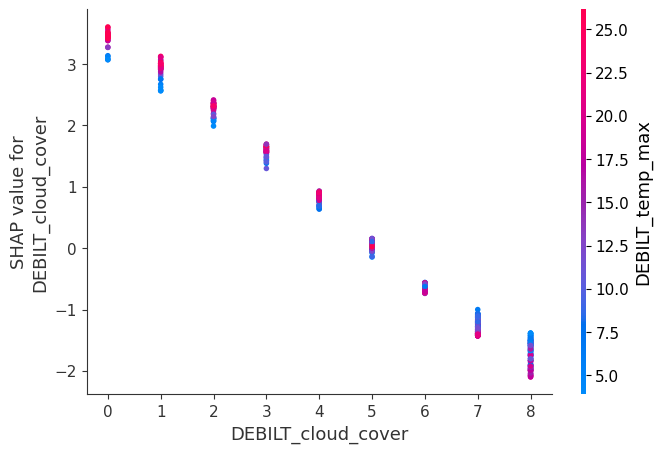


Counterfactual explanation for sample 502 with original prediction: [-0.4]
Modified feature values to achieve new prediction: [0.61]
Feature Modifications:
                                         Feature  Original Value  \
DEBILT_global_radiation  DEBILT_global_radiation            0.11   
DEBILT_cloud_cover            DEBILT_cloud_cover            8.00   

                         Modified Value  
DEBILT_global_radiation             0.6  
DEBILT_cloud_cover                  8.0  


Counterfactual explanation for sample 269 with original prediction: [0.3]
Modified feature values to achieve new prediction: [1.34]
Feature Modifications:
                                         Feature  Original Value  \
DEBILT_global_radiation  DEBILT_global_radiation            0.14   
DEBILT_cloud_cover            DEBILT_cloud_cover            6.00   

                         Modified Value  
DEBILT_global_radiation            0.29  
DEBILT_cloud_cover                 6.00  


Counterfactual explana

ExactExplainer explainer: 732it [00:51, 11.33it/s]                                                                     


SHAP Summary Plot for DRESDEN:


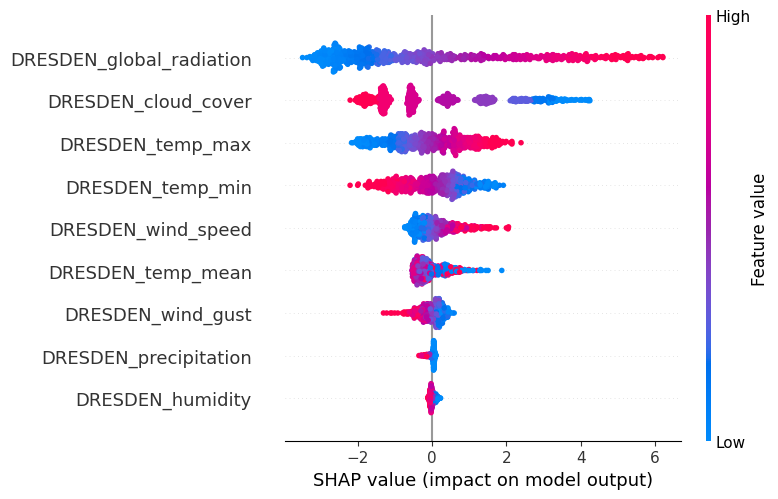

SHAP Dependence Plot for DRESDEN (first feature):


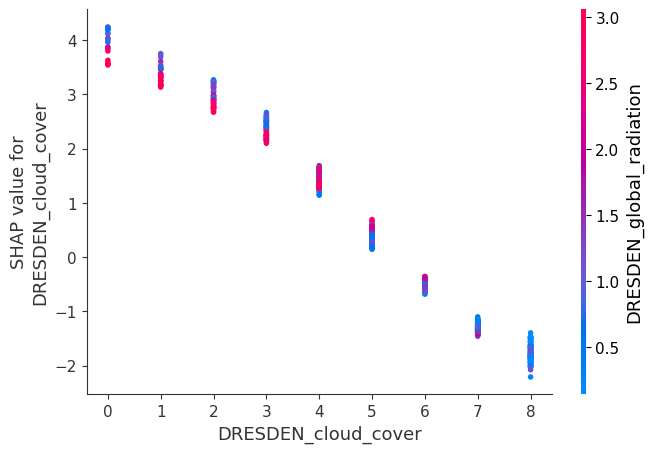


Counterfactual explanation for sample 597 with original prediction: [2.27]
Modified feature values to achieve new prediction: [1.27]
Feature Modifications:
                                           Feature  Original Value  \
DRESDEN_cloud_cover            DRESDEN_cloud_cover            7.00   
DRESDEN_global_radiation  DRESDEN_global_radiation            0.93   

                          Modified Value  
DRESDEN_cloud_cover                 9.07  
DRESDEN_global_radiation            0.93  


Counterfactual explanation for sample 429 with original prediction: [8.86]
Modified feature values to achieve new prediction: [7.86]
Feature Modifications:
                                 Feature  Original Value  Modified Value
DRESDEN_cloud_cover  DRESDEN_cloud_cover             0.0            2.36
DRESDEN_temp_min        DRESDEN_temp_min            -4.0           -4.00


Counterfactual explanation for sample 380 with original prediction: [7.28]
Modified feature values to achieve new prediction

ExactExplainer explainer: 732it [01:49,  6.02it/s]                                                                     


SHAP Summary Plot for DUSSELDORF:


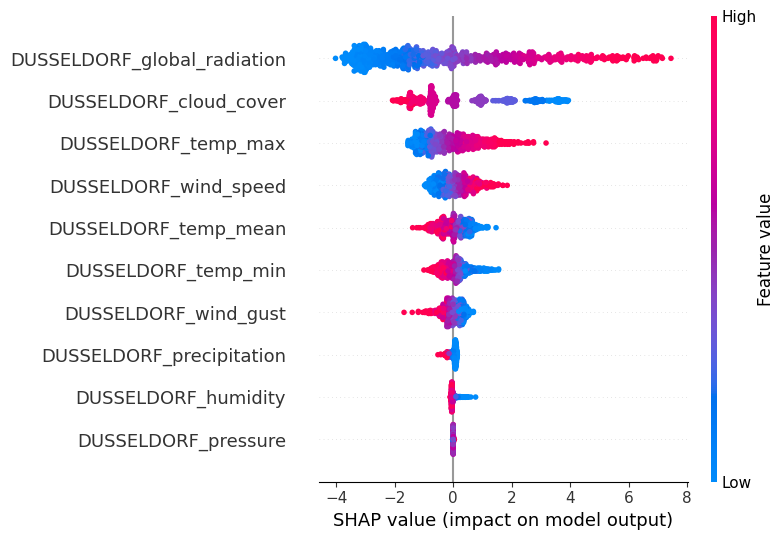

SHAP Dependence Plot for DUSSELDORF (first feature):


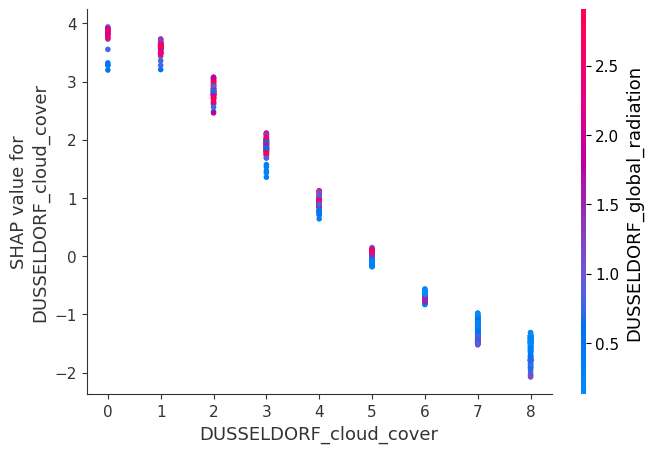


Counterfactual explanation for sample 318 with original prediction: [0.13]
Modified feature values to achieve new prediction: [1.16]
Feature Modifications:
                                                 Feature  Original Value  \
DUSSELDORF_global_radiation  DUSSELDORF_global_radiation            0.14   
DUSSELDORF_temp_max                  DUSSELDORF_temp_max            3.30   

                             Modified Value  
DUSSELDORF_global_radiation            0.36  
DUSSELDORF_temp_max                    3.30  


Counterfactual explanation for sample 78 with original prediction: [14.78]
Modified feature values to achieve new prediction: [15.8]
Feature Modifications:
                                                 Feature  Original Value  \
DUSSELDORF_global_radiation  DUSSELDORF_global_radiation            3.03   
DUSSELDORF_cloud_cover            DUSSELDORF_cloud_cover            2.00   

                             Modified Value  
DUSSELDORF_global_radiation            3.35

ExactExplainer explainer: 732it [00:52, 11.15it/s]                                                                     


SHAP Summary Plot for HEATHROW:


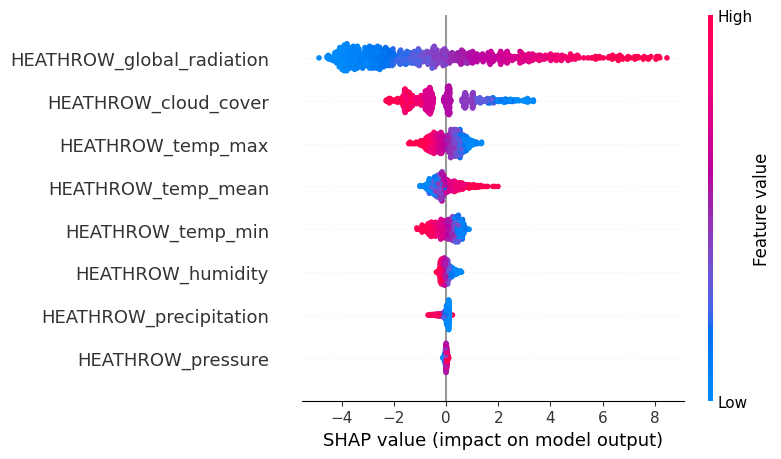

SHAP Dependence Plot for HEATHROW (first feature):


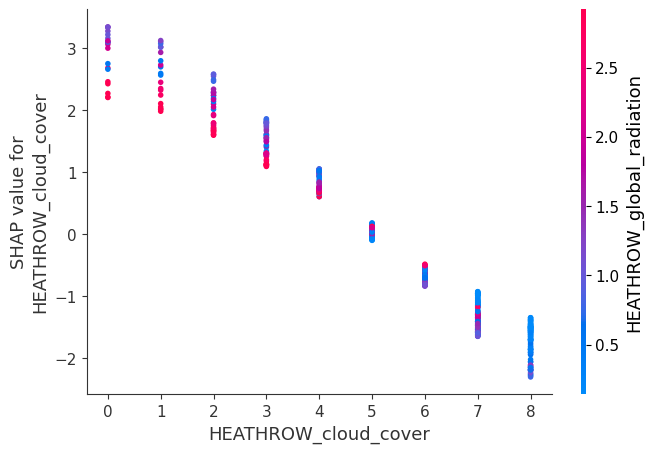


Counterfactual explanation for sample 366 with original prediction: [2.89]
Modified feature values to achieve new prediction: [3.9]
Feature Modifications:
                                             Feature  Original Value  \
HEATHROW_global_radiation  HEATHROW_global_radiation            0.75   
HEATHROW_cloud_cover            HEATHROW_cloud_cover            6.00   

                           Modified Value  
HEATHROW_global_radiation            1.12  
HEATHROW_cloud_cover                 6.00  


Counterfactual explanation for sample 141 with original prediction: [11.08]
Modified feature values to achieve new prediction: [12.11]
Feature Modifications:
                                             Feature  Original Value  \
HEATHROW_global_radiation  HEATHROW_global_radiation            2.91   
HEATHROW_temp_max                  HEATHROW_temp_max           27.30   

                           Modified Value  
HEATHROW_global_radiation            3.14  
HEATHROW_temp_max             

ExactExplainer explainer: 732it [01:41,  6.44it/s]                                                                     


SHAP Summary Plot for KASSEL:


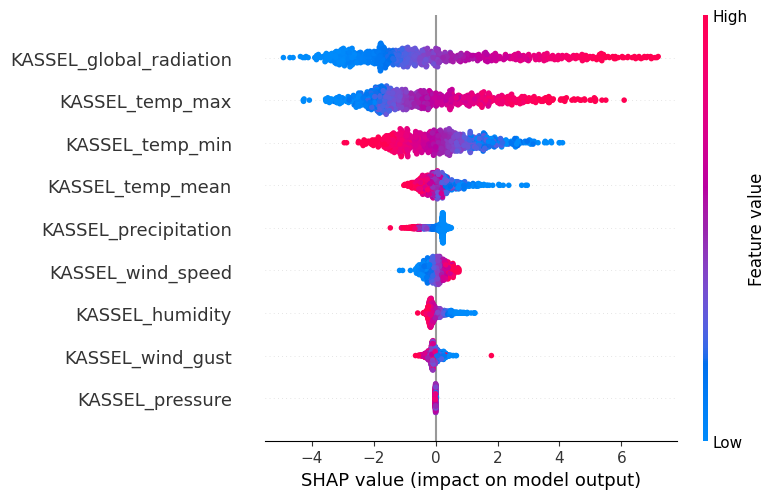

SHAP Dependence Plot for KASSEL (first feature):


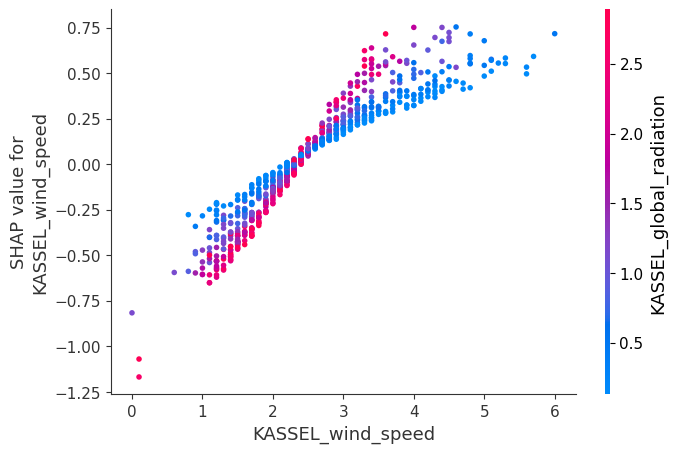


Counterfactual explanation for sample 352 with original prediction: [1.26]
Modified feature values to achieve new prediction: [2.26]
Feature Modifications:
                                         Feature  Original Value  \
KASSEL_temp_max                  KASSEL_temp_max           -1.00   
KASSEL_global_radiation  KASSEL_global_radiation            0.35   

                         Modified Value  
KASSEL_temp_max                    2.58  
KASSEL_global_radiation            0.35  


Counterfactual explanation for sample 433 with original prediction: [11.15]
Modified feature values to achieve new prediction: [12.16]
Feature Modifications:
                                         Feature  Original Value  \
KASSEL_global_radiation  KASSEL_global_radiation            2.69   
KASSEL_temp_max                  KASSEL_temp_max           20.30   

                         Modified Value  
KASSEL_global_radiation            2.97  
KASSEL_temp_max                   20.30  


Counterfactual expl

ExactExplainer explainer: 732it [01:33,  6.97it/s]                                                                     


SHAP Summary Plot for LJUBLJANA:


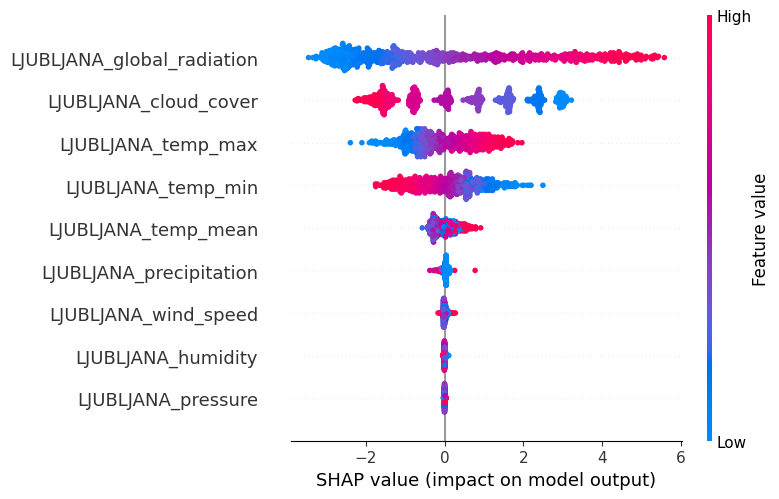

SHAP Dependence Plot for LJUBLJANA (first feature):


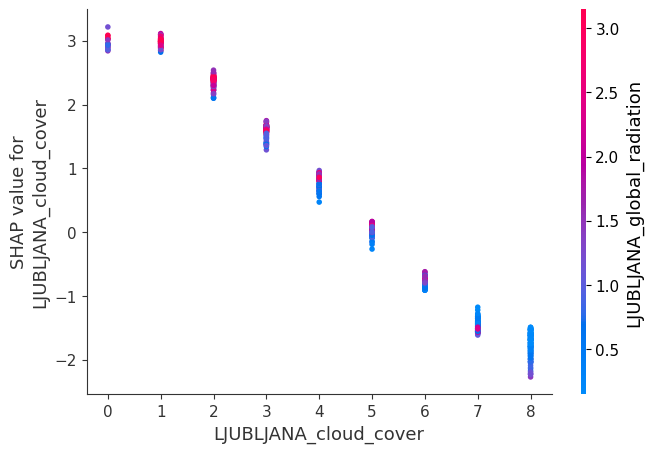


Counterfactual explanation for sample 275 with original prediction: [8.24]
Modified feature values to achieve new prediction: [7.23]
Feature Modifications:
                                     Feature  Original Value  Modified Value
LJUBLJANA_cloud_cover  LJUBLJANA_cloud_cover             3.0            4.52
LJUBLJANA_temp_min        LJUBLJANA_temp_min             1.3            1.30


Counterfactual explanation for sample 688 with original prediction: [0.71]
Modified feature values to achieve new prediction: [1.72]
Feature Modifications:
                                               Feature  Original Value  \
LJUBLJANA_global_radiation  LJUBLJANA_global_radiation            0.43   
LJUBLJANA_cloud_cover            LJUBLJANA_cloud_cover            8.00   

                            Modified Value  
LJUBLJANA_global_radiation            0.73  
LJUBLJANA_cloud_cover                 8.00  


Counterfactual explanation for sample 286 with original prediction: [8.58]
Modified feature va

ExactExplainer explainer: 732it [02:34,  4.44it/s]                                                                     


SHAP Summary Plot for MAASTRICHT:


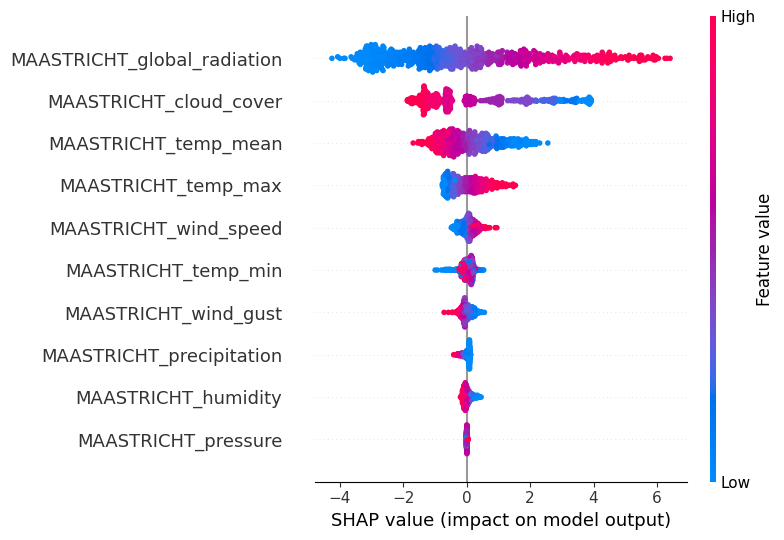

SHAP Dependence Plot for MAASTRICHT (first feature):


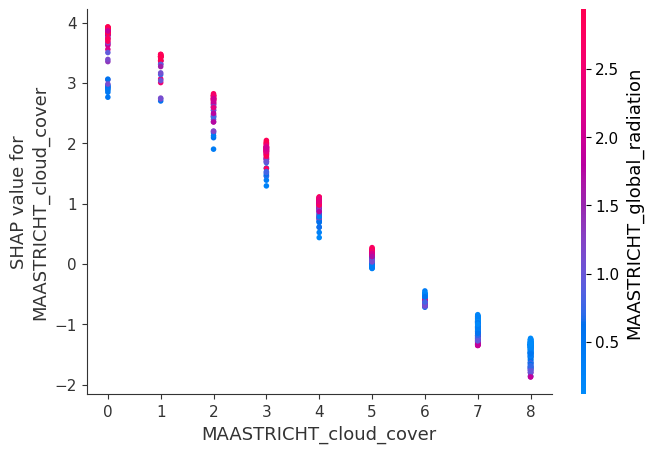


Counterfactual explanation for sample 115 with original prediction: [11.41]
Modified feature values to achieve new prediction: [12.43]
Feature Modifications:
                                                 Feature  Original Value  \
MAASTRICHT_global_radiation  MAASTRICHT_global_radiation            2.88   
MAASTRICHT_cloud_cover            MAASTRICHT_cloud_cover            2.00   

                             Modified Value  
MAASTRICHT_global_radiation            3.19  
MAASTRICHT_cloud_cover                 2.00  


Counterfactual explanation for sample 233 with original prediction: [3.41]
Modified feature values to achieve new prediction: [2.41]
Feature Modifications:
                                       Feature  Original Value  Modified Value
MAASTRICHT_temp_mean      MAASTRICHT_temp_mean             0.4            4.55
MAASTRICHT_cloud_cover  MAASTRICHT_cloud_cover             7.0            7.00


Counterfactual explanation for sample 48 with original prediction: [0.68]
Mod

ExactExplainer explainer: 732it [02:57,  3.89it/s]                                                                     


SHAP Summary Plot for MUENCHEN:


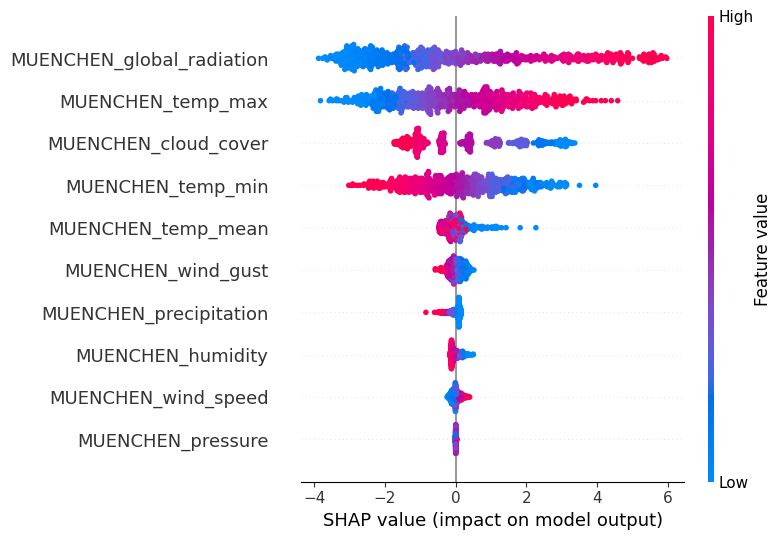

SHAP Dependence Plot for MUENCHEN (first feature):


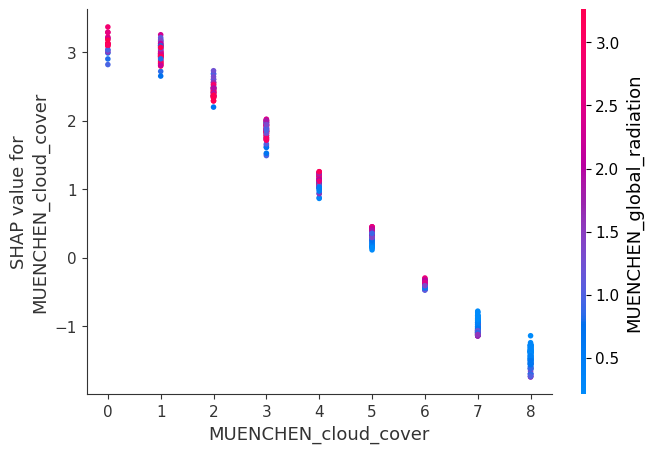


Counterfactual explanation for sample 548 with original prediction: [1.17]
Modified feature values to achieve new prediction: [0.17]
Feature Modifications:
                                             Feature  Original Value  \
MUENCHEN_cloud_cover            MUENCHEN_cloud_cover            7.00   
MUENCHEN_global_radiation  MUENCHEN_global_radiation            1.07   

                           Modified Value  
MUENCHEN_cloud_cover                10.21  
MUENCHEN_global_radiation            1.07  


Counterfactual explanation for sample 396 with original prediction: [4.95]
Modified feature values to achieve new prediction: [5.95]
Feature Modifications:
                             Feature  Original Value  Modified Value
MUENCHEN_temp_max  MUENCHEN_temp_max             5.9            9.18
MUENCHEN_temp_min  MUENCHEN_temp_min             0.1            0.10


Counterfactual explanation for sample 656 with original prediction: [9.33]
Modified feature values to achieve new prediction: [

ExactExplainer explainer: 732it [01:45,  6.24it/s]                                                                     


SHAP Summary Plot for OSLO:


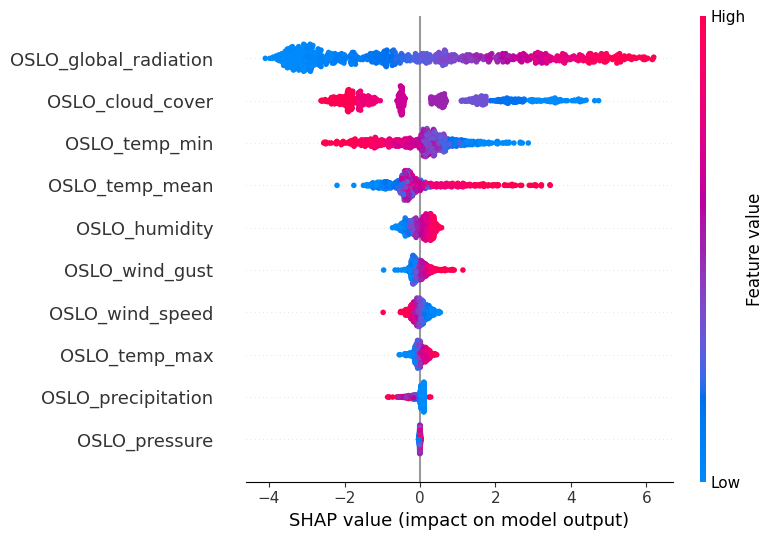

SHAP Dependence Plot for OSLO (first feature):


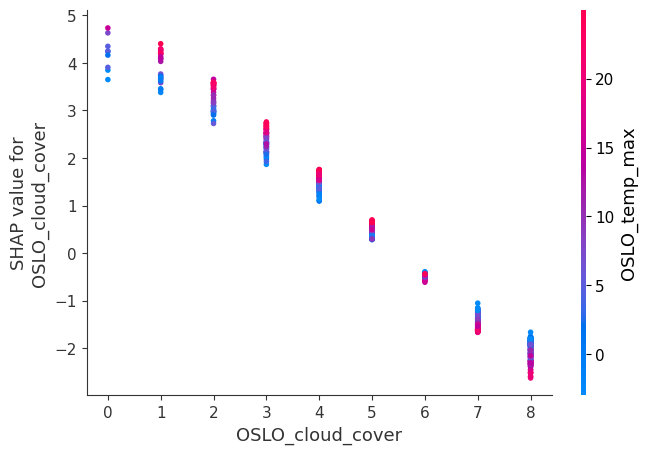


Counterfactual explanation for sample 38 with original prediction: [12.71]
Modified feature values to achieve new prediction: [13.72]
Feature Modifications:
                                     Feature  Original Value  Modified Value
OSLO_global_radiation  OSLO_global_radiation             2.9            3.38
OSLO_temp_mean                OSLO_temp_mean            24.5           24.50


Counterfactual explanation for sample 584 with original prediction: [-0.4]
Modified feature values to achieve new prediction: [0.62]
Feature Modifications:
                                     Feature  Original Value  Modified Value
OSLO_global_radiation  OSLO_global_radiation            0.05             0.3
OSLO_cloud_cover            OSLO_cloud_cover            8.00             8.0


Counterfactual explanation for sample 600 with original prediction: [1.66]
Modified feature values to achieve new prediction: [0.66]
Feature Modifications:
                                     Feature  Original Value  Mo

ExactExplainer explainer: 732it [00:33, 15.38it/s]                                                                     


SHAP Summary Plot for ROMA:


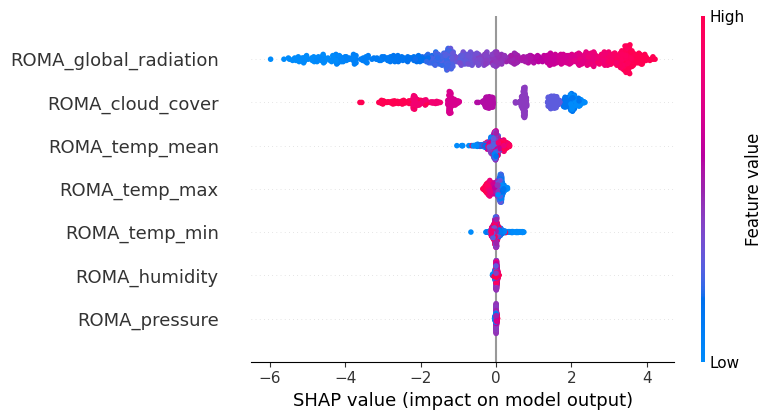

SHAP Dependence Plot for ROMA (first feature):


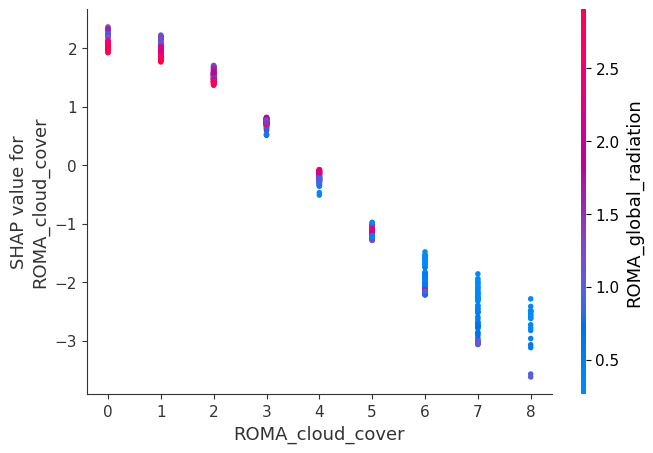


Counterfactual explanation for sample 603 with original prediction: [3.97]
Modified feature values to achieve new prediction: [2.97]
Feature Modifications:
                                     Feature  Original Value  Modified Value
ROMA_cloud_cover            ROMA_cloud_cover            6.00            7.01
ROMA_global_radiation  ROMA_global_radiation            1.23            1.23


Counterfactual explanation for sample 266 with original prediction: [9.46]
Modified feature values to achieve new prediction: [10.46]
Feature Modifications:
                                     Feature  Original Value  Modified Value
ROMA_global_radiation  ROMA_global_radiation            2.11            2.77
ROMA_cloud_cover            ROMA_cloud_cover            3.00            3.00


Counterfactual explanation for sample 10 with original prediction: [3.57]
Modified feature values to achieve new prediction: [2.57]
Feature Modifications:
                                     Feature  Original Value  Mod

ExactExplainer explainer: 732it [00:25, 19.60it/s]                                                                     


SHAP Summary Plot for SONNBLICK:


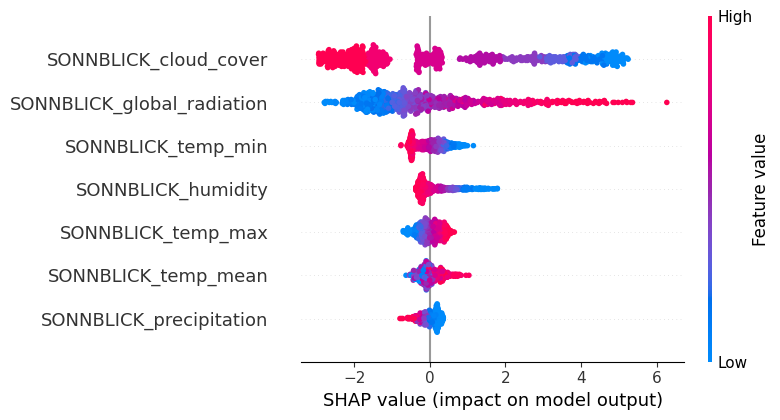

SHAP Dependence Plot for SONNBLICK (first feature):


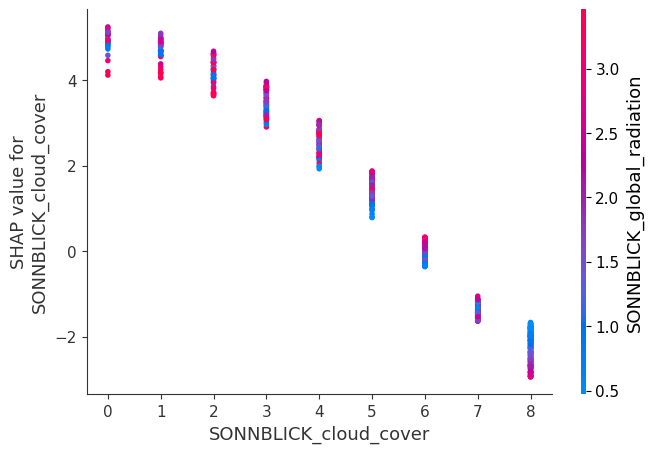


Counterfactual explanation for sample 409 with original prediction: [7.06]
Modified feature values to achieve new prediction: [6.06]
Feature Modifications:
                                               Feature  Original Value  \
SONNBLICK_cloud_cover            SONNBLICK_cloud_cover            2.00   
SONNBLICK_global_radiation  SONNBLICK_global_radiation            0.98   

                            Modified Value  
SONNBLICK_cloud_cover                 3.24  
SONNBLICK_global_radiation            0.98  


Counterfactual explanation for sample 492 with original prediction: [2.47]
Modified feature values to achieve new prediction: [3.47]
Feature Modifications:
                                               Feature  Original Value  \
SONNBLICK_global_radiation  SONNBLICK_global_radiation            1.29   
SONNBLICK_temp_min                  SONNBLICK_temp_min          -17.50   

                            Modified Value  
SONNBLICK_global_radiation            1.86  
SONNBLICK_temp

ExactExplainer explainer: 732it [00:14, 17.51it/s]                                                                     


SHAP Summary Plot for STOCKHOLM:


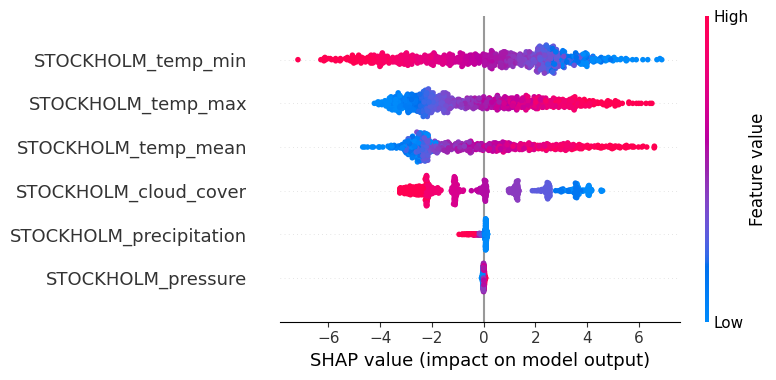

SHAP Dependence Plot for STOCKHOLM (first feature):


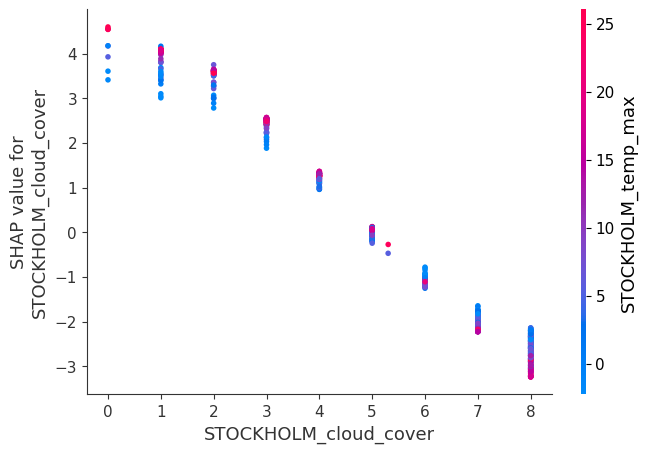


Counterfactual explanation for sample 261 with original prediction: [1.88]
Modified feature values to achieve new prediction: [0.87]
Feature Modifications:
                                         Feature  Original Value  \
STOCKHOLM_cloud_cover      STOCKHOLM_cloud_cover             8.0   
STOCKHOLM_precipitation  STOCKHOLM_precipitation             2.1   

                         Modified Value  
STOCKHOLM_cloud_cover              9.01  
STOCKHOLM_precipitation            2.10  


Counterfactual explanation for sample 240 with original prediction: [5.13]
Modified feature values to achieve new prediction: [4.12]
Feature Modifications:
                                     Feature  Original Value  Modified Value
STOCKHOLM_cloud_cover  STOCKHOLM_cloud_cover             7.0            7.71
STOCKHOLM_temp_max        STOCKHOLM_temp_max            17.2           17.20


Counterfactual explanation for sample 33 with original prediction: [13.06]
Modified feature values to achieve new predict

In [5]:
cities = [col.rsplit('_', 1)[0] for col in data.columns if col.endswith('_sunshine')]
# Iterate over each city in the list of cities
for city in cities:
    # Initialize an empty list to hold the feature columns for the current city
    feature_columns = []
    
    # Iterate over all columns in the dataset to identify feature columns
    for col in data.columns:
        # Check if the column name starts with the current city and does not end with '_sunshine'
        if col.startswith(city) and not col.endswith('_sunshine'):
            # If the condition is met, add the column to the feature_columns list
            feature_columns.append(col)
    
    # Define the target column for the current city
    target_column = f'{city}_sunshine'
    
    # Check if the target column (e.g., 'city_sunshine') exists in the dataset
    if target_column not in data.columns:
        # If the target column is missing, print a message and skip the current city
        print(f"Skipping {city} because no '_sunshine' column is present.")
        continue

    # Create the feature matrix (X) by selecting the feature columns from the dataset
    X = data[feature_columns]
    
    # Create the target vector (y) by selecting the target column from the dataset
    y = data[target_column]

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define a simple CNN model
    cnn_model = models.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),
        layers.Conv1D(64, kernel_size=3, activation='relu'),
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1) 
    ])
    
    cnn_model.compile(optimizer='adam', loss='mean_squared_error')

    history = cnn_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)

    y_pred = cnn_model.predict(X_test, verbose=0)
    
    # Evaluate the model on the test data
    test_loss = cnn_model.evaluate(X_test, y_test)
    
    test_loss

    explainer = shap.Explainer(cnn_model, X_train)
    shap_values = explainer(X_test)
    
    # Visualize SHAP values for feature importance (summary plot)
    print(f"SHAP Summary Plot for {city}:")
    shap.summary_plot(shap_values.values, X_test, feature_names=feature_columns)

    #  Visualize SHAP dependence for specific features
    print(f"SHAP Dependence Plot for {city} (first feature):")
    shap.dependence_plot(feature_columns[0], shap_values.values, X_test)

    # Randomly select a specified number of samples from the test data for counterfactual explanations
    num_samples = num_samples_to_display  # Define the number of samples to display
    random_samples_idx = random.sample(range(len(X_test)), num_samples)
    
    # Iterate over the randomly selected sample indices
    for idx in random_samples_idx:
        # Extract the feature values for the current sample (row) and create a copy
        x_instance = X_test.iloc[idx, :].copy()
        
        # Convert the extracted row to a one-row DataFrame to maintain column names
        x_instance = pd.DataFrame([x_instance], columns=X_test.columns)
        
        # Get the SHAP values for the current sample (idx)
        shap_values_current_sample = shap_values[idx].values
        
        # Sort the SHAP values by absolute value to identify the most important features
        sorted_feature_indices = np.argsort(-np.abs(shap_values_current_sample))
        
        # Select the top 'num_features_to_modify' features based on SHAP importance for this sample
        top_features_idx = sorted_feature_indices[:num_features_to_modify]
        
        # Create a list of the most important features for modification
        top_features = []
        for j in top_features_idx:
            top_features.append(feature_columns[j])
        
        # Store the original values of the top features before making modifications
        original_values = x_instance[top_features].copy()
        
        # Loop through the top features to modify them one by one
        for feature in top_features:
            # Set the step size for modifying the feature
            step_size = 0.01
            
            # Continue modifying the feature until the desired change in prediction is achieved
            current_difference = abs(cnn_model.predict(x_instance, verbose=0)[0] - y_pred[idx])
            while current_difference < desired_change:
                # Modify the feature value by adding the step size
                x_instance[feature] += step_size
                
                # Recalculate the prediction after the modification
                new_pred = cnn_model.predict(x_instance, verbose=0)[0]
                
                # Update the current difference between the new and old predictions
                current_difference = abs(new_pred - y_pred[idx])
        
        # After modifying the features, display the original and modified feature values
        modified_values = x_instance[top_features]
        
        # Create a DataFrame to show the original and modified values side by side
        changes = pd.DataFrame({
            'Feature': top_features,                # Feature names
            'Original Value': original_values.iloc[0],  # Original values before modification
            'Modified Value': modified_values.iloc[0]   # Modified values after modification
        })
        
        # Display the counterfactual explanation for the current sample
        print(f"\nCounterfactual explanation for sample {idx + 1} with original prediction: {np.around(y_pred[idx], 2)}")
        print(f"Modified feature values to achieve new prediction: {np.around(new_pred, 2)}")
        print(f"Feature Modifications:\n{changes}\n")

    
    # After processing the selected random samples, display a summary message
    print(f"Displayed {num_samples} random samples for {city}.")
    print("*" * 100)
    print(f"\n\n\n")

ExactExplainer explainer: 732it [00:22, 17.85it/s]                                                                     

Counterfactual explanation for sample 305 with original prediction: [6.03]
Modified feature values to achieve new prediction: [7.06]
Feature Modifications:
                                       Feature  Original Value  Modified Value
BASEL_global_radiation  BASEL_global_radiation            2.25            2.58
BASEL_temp_min                  BASEL_temp_min           16.40           16.40


Counterfactual explanation for sample 645 with original prediction: [6.84]
Modified feature values to achieve new prediction: [7.84]
Feature Modifications:
                                       Feature  Original Value  Modified Value
BASEL_temp_max                  BASEL_temp_max           21.40           25.60
BASEL_global_radiation  BASEL_global_radiation            1.49            1.49


Counterfactual explanation for sample 60 with original prediction: [14.12]
Modified feature values to achieve new prediction: [15.12]
Feature Modifications:
                                       Feature  Original Value  Modified Value
BASEL_global_radiation  BASEL_global_radiation            3.06            3.51
BASEL_cloud_cover            BASEL_cloud_cover            1.00            1.00

Displayed 3 random samples for BASEL.
****************************************************************************************************




ExactExplainer explainer: 732it [00:13, 13.98it/s]                                                                     

Counterfactual explanation for sample 390 with original prediction: [5.38]
Modified feature values to achieve new prediction: [4.38]
Feature Modifications:
                                             Feature  Original Value  \
BUDAPEST_cloud_cover            BUDAPEST_cloud_cover            1.00   
BUDAPEST_global_radiation  BUDAPEST_global_radiation            0.69   

                           Modified Value  
BUDAPEST_cloud_cover                 3.25  
BUDAPEST_global_radiation            0.69  


Counterfactual explanation for sample 729 with original prediction: [9.01]
Modified feature values to achieve new prediction: [10.02]
Feature Modifications:
                                             Feature  Original Value  \
BUDAPEST_global_radiation  BUDAPEST_global_radiation            2.32   
BUDAPEST_cloud_cover            BUDAPEST_cloud_cover            4.00   

                           Modified Value  
BUDAPEST_global_radiation            2.68  
BUDAPEST_cloud_cover                 4.00  


Counterfactual explanation for sample 420 with original prediction: [3.3]
Modified feature values to achieve new prediction: [4.31]
Feature Modifications:
                                             Feature  Original Value  \
BUDAPEST_global_radiation  BUDAPEST_global_radiation            0.64   
BUDAPEST_humidity                  BUDAPEST_humidity            0.84   

                           Modified Value  
BUDAPEST_global_radiation            1.08  
BUDAPEST_humidity                    0.84  

Displayed 3 random samples for BUDAPEST.
****************************************************************************************************




ExactExplainer explainer: 732it [01:24,  7.66it/s]                                                                     

Counterfactual explanation for sample 570 with original prediction: [3.19]
Modified feature values to achieve new prediction: [4.21]
Feature Modifications:
                                         Feature  Original Value  \
DEBILT_global_radiation  DEBILT_global_radiation            0.43   
DEBILT_temp_mean                DEBILT_temp_mean           -3.10   

                         Modified Value  
DEBILT_global_radiation            0.58  
DEBILT_temp_mean                  -3.10  


Counterfactual explanation for sample 305 with original prediction: [3.6]
Modified feature values to achieve new prediction: [2.6]
Feature Modifications:
                               Feature  Original Value  Modified Value
DEBILT_temp_mean      DEBILT_temp_mean            18.7           21.87
DEBILT_cloud_cover  DEBILT_cloud_cover             7.0            7.00


Counterfactual explanation for sample 460 with original prediction: [2.9]
Modified feature values to achieve new prediction: [3.9]
Feature Modifications:
                                         Feature  Original Value  \
DEBILT_global_radiation  DEBILT_global_radiation            0.69   
DEBILT_cloud_cover            DEBILT_cloud_cover            6.00   

                         Modified Value  
DEBILT_global_radiation            1.01  
DEBILT_cloud_cover                 6.00  

Displayed 3 random samples for DEBILT.
****************************************************************************************************




ExactExplainer explainer: 732it [00:40, 13.56it/s]                                                                     

Counterfactual explanation for sample 646 with original prediction: [7.34]
Modified feature values to achieve new prediction: [6.34]
Feature Modifications:
                           Feature  Original Value  Modified Value
DRESDEN_temp_min  DRESDEN_temp_min            -7.0           -0.43
DRESDEN_temp_max  DRESDEN_temp_max             1.1            1.10


Counterfactual explanation for sample 431 with original prediction: [12.52]
Modified feature values to achieve new prediction: [11.52]
Feature Modifications:
                                           Feature  Original Value  \
DRESDEN_cloud_cover            DRESDEN_cloud_cover             1.0   
DRESDEN_global_radiation  DRESDEN_global_radiation             2.5   

                          Modified Value  
DRESDEN_cloud_cover                 2.88  
DRESDEN_global_radiation            2.50  


Counterfactual explanation for sample 316 with original prediction: [0.38]
Modified feature values to achieve new prediction: [1.4]
Feature Modifications:
                                           Feature  Original Value  \
DRESDEN_global_radiation  DRESDEN_global_radiation             0.3   
DRESDEN_cloud_cover            DRESDEN_cloud_cover             8.0   

                          Modified Value  
DRESDEN_global_radiation            0.68  
DRESDEN_cloud_cover                 8.00  

Displayed 3 random samples for DRESDEN.
****************************************************************************************************




ExactExplainer explainer: 732it [01:23,  7.73it/s]                                                                     

Counterfactual explanation for sample 279 with original prediction: [0.35]
Modified feature values to achieve new prediction: [1.38]
Feature Modifications:
                                                 Feature  Original Value  \
DUSSELDORF_global_radiation  DUSSELDORF_global_radiation            0.12   
DUSSELDORF_wind_speed              DUSSELDORF_wind_speed            8.50   

                             Modified Value  
DUSSELDORF_global_radiation            0.38  
DUSSELDORF_wind_speed                  8.50  


Counterfactual explanation for sample 381 with original prediction: [3.19]
Modified feature values to achieve new prediction: [2.19]
Feature Modifications:
                                       Feature  Original Value  Modified Value
DUSSELDORF_cloud_cover  DUSSELDORF_cloud_cover             6.0            7.43
DUSSELDORF_temp_max        DUSSELDORF_temp_max            12.6           12.60


Counterfactual explanation for sample 226 with original prediction: [0.87]
Modified feature values to achieve new prediction: [1.88]
Feature Modifications:
                                                 Feature  Original Value  \
DUSSELDORF_global_radiation  DUSSELDORF_global_radiation            0.53   
DUSSELDORF_cloud_cover            DUSSELDORF_cloud_cover            6.00   

                             Modified Value  
DUSSELDORF_global_radiation            0.79  
DUSSELDORF_cloud_cover                 6.00  

Displayed 3 random samples for DUSSELDORF.
****************************************************************************************************




ExactExplainer explainer: 732it [00:21, 18.11it/s]                                                                     

Counterfactual explanation for sample 419 with original prediction: [2.86]
Modified feature values to achieve new prediction: [1.86]
Feature Modifications:
                             Feature  Original Value  Modified Value
HEATHROW_temp_min  HEATHROW_temp_min            14.7           31.44
HEATHROW_temp_max  HEATHROW_temp_max            23.4           23.40


Counterfactual explanation for sample 25 with original prediction: [0.3]
Modified feature values to achieve new prediction: [1.31]
Feature Modifications:
                                             Feature  Original Value  \
HEATHROW_global_radiation  HEATHROW_global_radiation            0.42   
HEATHROW_cloud_cover            HEATHROW_cloud_cover            8.00   

                           Modified Value  
HEATHROW_global_radiation            0.97  
HEATHROW_cloud_cover                 8.00  


Counterfactual explanation for sample 680 with original prediction: [8.63]
Modified feature values to achieve new prediction: [7.62]
Feature Modifications:
                                             Feature  Original Value  \
HEATHROW_cloud_cover            HEATHROW_cloud_cover            2.00   
HEATHROW_global_radiation  HEATHROW_global_radiation            1.76   

                           Modified Value  
HEATHROW_cloud_cover                 3.36  
HEATHROW_global_radiation            1.76  

Displayed 3 random samples for HEATHROW.
****************************************************************************************************




ExactExplainer explainer: 732it [00:42, 13.17it/s]                                                                     

Counterfactual explanation for sample 450 with original prediction: [2.79]
Modified feature values to achieve new prediction: [1.79]
Feature Modifications:
                         Feature  Original Value  Modified Value
KASSEL_temp_min  KASSEL_temp_min            14.3           17.32
KASSEL_temp_max  KASSEL_temp_max            21.5           21.50


Counterfactual explanation for sample 437 with original prediction: [11.07]
Modified feature values to achieve new prediction: [12.08]
Feature Modifications:
                                         Feature  Original Value  \
KASSEL_global_radiation  KASSEL_global_radiation            2.51   
KASSEL_temp_max                  KASSEL_temp_max           25.50   

                         Modified Value  
KASSEL_global_radiation            2.76  
KASSEL_temp_max                   25.50  


Counterfactual explanation for sample 593 with original prediction: [14.02]
Modified feature values to achieve new prediction: [15.03]
Feature Modifications:
                                         Feature  Original Value  \
KASSEL_global_radiation  KASSEL_global_radiation             2.8   
KASSEL_temp_max                  KASSEL_temp_max            26.7   

                         Modified Value  
KASSEL_global_radiation            3.05  
KASSEL_temp_max                   26.70  

Displayed 3 random samples for KASSEL.
****************************************************************************************************




ExactExplainer explainer: 732it [00:41, 13.32it/s]                                                                     

Counterfactual explanation for sample 309 with original prediction: [0.53]
Modified feature values to achieve new prediction: [1.55]
Feature Modifications:
                                               Feature  Original Value  \
LJUBLJANA_global_radiation  LJUBLJANA_global_radiation            0.44   
LJUBLJANA_cloud_cover            LJUBLJANA_cloud_cover            7.00   

                            Modified Value  
LJUBLJANA_global_radiation             1.1  
LJUBLJANA_cloud_cover                  7.0  


Counterfactual explanation for sample 40 with original prediction: [1.14]
Modified feature values to achieve new prediction: [0.14]
Feature Modifications:
                                               Feature  Original Value  \
LJUBLJANA_cloud_cover            LJUBLJANA_cloud_cover            7.00   
LJUBLJANA_global_radiation  LJUBLJANA_global_radiation            0.87   

                            Modified Value  
LJUBLJANA_cloud_cover                 9.29  
LJUBLJANA_global_radiation            0.87  


Counterfactual explanation for sample 162 with original prediction: [4.43]
Modified feature values to achieve new prediction: [3.43]
Feature Modifications:
                                               Feature  Original Value  \
LJUBLJANA_temp_min                  LJUBLJANA_temp_min           -0.70   
LJUBLJANA_global_radiation  LJUBLJANA_global_radiation            1.14   

                            Modified Value  
LJUBLJANA_temp_min                    6.08  
LJUBLJANA_global_radiation            1.14  

Displayed 3 random samples for LJUBLJANA.
****************************************************************************************************




ExactExplainer explainer: 732it [01:46,  6.30it/s]                                                                     

Counterfactual explanation for sample 124 with original prediction: [0.26]
Modified feature values to achieve new prediction: [1.27]
Feature Modifications:
                                                 Feature  Original Value  \
MAASTRICHT_global_radiation  MAASTRICHT_global_radiation            0.08   
MAASTRICHT_cloud_cover            MAASTRICHT_cloud_cover            8.00   

                             Modified Value  
MAASTRICHT_global_radiation            0.32  
MAASTRICHT_cloud_cover                 8.00  


Counterfactual explanation for sample 729 with original prediction: [13.87]
Modified feature values to achieve new prediction: [14.88]
Feature Modifications:
                                                 Feature  Original Value  \
MAASTRICHT_global_radiation  MAASTRICHT_global_radiation            3.18   
MAASTRICHT_cloud_cover            MAASTRICHT_cloud_cover            0.00   

                             Modified Value  
MAASTRICHT_global_radiation            3.55  
MAASTRICHT_cloud_cover                 0.00  


Counterfactual explanation for sample 726 with original prediction: [3.89]
Modified feature values to achieve new prediction: [4.89]
Feature Modifications:
                                                 Feature  Original Value  \
MAASTRICHT_wind_speed              MAASTRICHT_wind_speed            2.00   
MAASTRICHT_global_radiation  MAASTRICHT_global_radiation            1.15   

                             Modified Value  
MAASTRICHT_wind_speed                  5.33  
MAASTRICHT_global_radiation            1.15  

Displayed 3 random samples for MAASTRICHT.
****************************************************************************************************




ExactExplainer explainer: 732it [01:40,  6.44it/s]                                                                     

Counterfactual explanation for sample 108 with original prediction: [0.89]
Modified feature values to achieve new prediction: [1.89]
Feature Modifications:
                                             Feature  Original Value  \
MUENCHEN_global_radiation  MUENCHEN_global_radiation            0.79   
MUENCHEN_temp_min                  MUENCHEN_temp_min           13.60   

                           Modified Value  
MUENCHEN_global_radiation            1.36  
MUENCHEN_temp_min                   13.60  


Counterfactual explanation for sample 614 with original prediction: [12.02]
Modified feature values to achieve new prediction: [11.02]
Feature Modifications:
                                   Feature  Original Value  Modified Value
MUENCHEN_cloud_cover  MUENCHEN_cloud_cover             0.0            2.18
MUENCHEN_temp_max        MUENCHEN_temp_max            24.5           24.50


Counterfactual explanation for sample 251 with original prediction: [13.67]
Modified feature values to achieve new prediction: [14.69]
Feature Modifications:
                                             Feature  Original Value  \
MUENCHEN_global_radiation  MUENCHEN_global_radiation            3.14   
MUENCHEN_cloud_cover            MUENCHEN_cloud_cover            1.00   

                           Modified Value  
MUENCHEN_global_radiation            3.54  
MUENCHEN_cloud_cover                 1.00  

Displayed 3 random samples for MUENCHEN.
****************************************************************************************************




ExactExplainer explainer: 732it [02:00,  5.48it/s]                                                                     

Counterfactual explanation for sample 337 with original prediction: [7.48]
Modified feature values to achieve new prediction: [6.48]
Feature Modifications:
                                     Feature  Original Value  Modified Value
OSLO_cloud_cover            OSLO_cloud_cover            2.00            3.06
OSLO_global_radiation  OSLO_global_radiation            0.66            0.66


Counterfactual explanation for sample 184 with original prediction: [7.73]
Modified feature values to achieve new prediction: [6.73]
Feature Modifications:
                                     Feature  Original Value  Modified Value
OSLO_cloud_cover            OSLO_cloud_cover            1.00            3.89
OSLO_global_radiation  OSLO_global_radiation            0.48            0.48


Counterfactual explanation for sample 641 with original prediction: [6.22]
Modified feature values to achieve new prediction: [7.23]
Feature Modifications:
                                     Feature  Original Value  Modified Value
OSLO_global_radiation  OSLO_global_radiation            1.82            2.26
OSLO_temp_min                  OSLO_temp_min            9.90            9.90

Displayed 3 random samples for OSLO.
****************************************************************************************************




ExactExplainer explainer: 732it [00:24, 17.49it/s]                                                                     

Counterfactual explanation for sample 204 with original prediction: [10.22]
Modified feature values to achieve new prediction: [11.22]
Feature Modifications:
                                     Feature  Original Value  Modified Value
ROMA_global_radiation  ROMA_global_radiation            2.08            2.46
ROMA_cloud_cover            ROMA_cloud_cover            2.00            2.00


Counterfactual explanation for sample 21 with original prediction: [6.13]
Modified feature values to achieve new prediction: [7.15]
Feature Modifications:
                                     Feature  Original Value  Modified Value
ROMA_global_radiation  ROMA_global_radiation             1.1            1.43
ROMA_temp_mean                ROMA_temp_mean            11.8           11.80


Counterfactual explanation for sample 634 with original prediction: [6.25]
Modified feature values to achieve new prediction: [5.24]
Feature Modifications:
                                     Feature  Original Value  Modified Value
ROMA_cloud_cover            ROMA_cloud_cover             5.0            5.85
ROMA_global_radiation  ROMA_global_radiation             1.6            1.60

Displayed 3 random samples for ROMA.
****************************************************************************************************




ExactExplainer explainer: 732it [00:24, 17.50it/s]                                                                     

Counterfactual explanation for sample 271 with original prediction: [3.56]
Modified feature values to achieve new prediction: [4.58]
Feature Modifications:
                                               Feature  Original Value  \
SONNBLICK_global_radiation  SONNBLICK_global_radiation             0.8   
SONNBLICK_cloud_cover            SONNBLICK_cloud_cover             5.0   

                            Modified Value  
SONNBLICK_global_radiation            1.13  
SONNBLICK_cloud_cover                 5.00  


Counterfactual explanation for sample 442 with original prediction: [6.04]
Modified feature values to achieve new prediction: [7.04]
Feature Modifications:
                                               Feature  Original Value  \
SONNBLICK_temp_mean                SONNBLICK_temp_mean            3.80   
SONNBLICK_global_radiation  SONNBLICK_global_radiation            2.32   

                            Modified Value  
SONNBLICK_temp_mean                  17.61  
SONNBLICK_global_radiation            2.32  


Counterfactual explanation for sample 84 with original prediction: [6.88]
Modified feature values to achieve new prediction: [7.9]
Feature Modifications:
                                               Feature  Original Value  \
SONNBLICK_global_radiation  SONNBLICK_global_radiation            3.51   
SONNBLICK_cloud_cover            SONNBLICK_cloud_cover            7.00   

                            Modified Value  
SONNBLICK_global_radiation            3.85  
SONNBLICK_cloud_cover                 7.00  

Displayed 3 random samples for SONNBLICK.
****************************************************************************************************




ExactExplainer explainer: 732it [00:16, 18.55it/s]                                                                     

Counterfactual explanation for sample 138 with original prediction: [0.33]
Modified feature values to achieve new prediction: [-0.67]
Feature Modifications:
                                     Feature  Original Value  Modified Value
STOCKHOLM_cloud_cover  STOCKHOLM_cloud_cover             8.0           16.11
STOCKHOLM_temp_max        STOCKHOLM_temp_max             9.6            9.60


Counterfactual explanation for sample 18 with original prediction: [0.26]
Modified feature values to achieve new prediction: [1.27]
Feature Modifications:
                                     Feature  Original Value  Modified Value
STOCKHOLM_temp_max        STOCKHOLM_temp_max             3.5            7.61
STOCKHOLM_cloud_cover  STOCKHOLM_cloud_cover             8.0            8.00


Counterfactual explanation for sample 233 with original prediction: [1.94]
Modified feature values to achieve new prediction: [0.93]
Feature Modifications:
                               Feature  Original Value  Modified Value
STOCKHOLM_temp_min  STOCKHOLM_temp_min            -7.6           -4.14
STOCKHOLM_temp_max  STOCKHOLM_temp_max            -3.6           -3.60

Displayed 3 random samples for STOCKHOLM.
****************************************************************************************************
